# Homework 3: Data Wrangling and Exploratory Data Analysis

Ta-Feng is a retail warehouse in Taiwan that mainly sells food-products though it stocks some office and home products.  Like Costco and Sam's Club, it operates on a club structure wherein people buy a membership to gain access to the store.  As a result, purchases can be traced to specific customers.  In this homework, we will use this database to practice data wrangling, exploratory data analysis, and visualization.

Throughout the assignment, make sure that each plot has meaningful labels that characterize the variable represented and its units.

# Setup

In [7]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy, Datascience, pandas modules.
import numpy as np
import pandas as pd
import seaborn as sns

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')

Assignment: Homework 3
OK, version v1.11.1



# Importing Data

In this section, we run through some problems that you might face as you go through the innocuous-sounding process of "importing data."  We also have you process some variables that aren't in the most user-friendly form.

### Age Classes
We'll start by looking at `age_classes.txt`, which is a lookup table for our main Ta Feng table.

In [8]:
!head "age_classes.txt"

A 0-25
B 25-29
C 30-34
D 35-39
E 40-44
F 45-49
G 50-54
H 55-59
I 60-64
J 65-120

In [9]:
with open("age_classes.txt", "rb") as f:
    print(f.read(10))

b'A 0-25\nB 2'


#### Question 1
What is the delimiter used in this file?

space is used for fields and newline is used between lines

Let's read in `age_classes.txt` as a data frame called `age_classes`.  Use the column names provided below.

In [10]:
age_class_columns = ['code', 'age_range']
age_classes = pd.read_csv('age_classes.txt',  sep=" ",
                          header=None, names=age_class_columns)
age_classes

,code,age_range
0,A,0-25
1,B,25-29
2,C,30-34
3,D,35-39
4,E,40-44
5,F,45-49
6,G,50-54
7,H,55-59
8,I,60-64
9,J,65-120


#### Question 2
What type of variable is `age_range`? Continuous, discrete, nominal, ordinal or other?  Make sure the type of `age_range` in the data frame `age_classes` matches your answer.

It's an ordinal variable stored in string

In [11]:
age_classes.age_range = age_classes.age_range.astype("category")
age_classes.dtypes

code           object
age_range    category
dtype: object

In [12]:
_ = ok.grade('q02')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: doomsplayer@gmail.com



#### Question 3

Perhaps at some point we would like to work with the age data numerically.  Derive two numerical columns from `age_range` called `age_min` and `age_max`, which contain the left and right endpoints of `age_range`, respectively.

In [13]:
splited = age_classes.age_range.str.split("-")

In [14]:
age_classes["age_min"] = splited.map(lambda x: int(x[0]))
age_classes["age_max"] = splited.map(lambda x: int(x[1]))

In [15]:
age_classes

,code,age_range,age_min,age_max
0,A,0-25,0,25
1,B,25-29,25,29
2,C,30-34,30,34
3,D,35-39,35,39
4,E,40-44,40,44
5,F,45-49,45,49
6,G,50-54,50,54
7,H,55-59,55,59
8,I,60-64,60,64
9,J,65-120,65,120


In [16]:
_ = ok.grade('q03')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: doomsplayer@gmail.com



#### Question 4
To have a single column representing age, we could reduce the two endpoints to a single number.  Compute an additional `age_center` attribute that is equal to the midpoint of `age_range`.

In [17]:
(age_classes.age_min.data + age_classes.age_max)

0     25
1     54
2     64
3     74
4     84
5     94
6    104
7    114
8    124
9    185
Name: age_max, dtype: int64

In [18]:
age_classes["age_center"] = (age_classes["age_min"] + age_classes["age_max"]).astype("int")/2
age_classes

,code,age_range,age_min,age_max,age_center
0,A,0-25,0,25,12.5
1,B,25-29,25,29,27.0
2,C,30-34,30,34,32.0
3,D,35-39,35,39,37.0
4,E,40-44,40,44,42.0
5,F,45-49,45,49,47.0
6,G,50-54,50,54,52.0
7,H,55-59,55,59,57.0
8,I,60-64,60,64,62.0
9,J,65-120,65,120,92.5


In [19]:
_ = ok.grade('q04')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: doomsplayer@gmail.com



### Residence Area

Now inspect `residence_area.txt` in your terminal window.  We'll read in the data in the next cell.

In [20]:
!head "residence_area.txt"

A: 105
B: 106
C: 110
D: 114
E: 115
F: 221
G: others
H: unknown


In [21]:
# If you use a single character delimiter, it uses the faster engine ... 
residence_areas = pd.read_csv('residence_area.txt', 
                              delimiter=':',
                              header=None, 
                              names=['code','area'])
# Need to remove the leading whitespace
residence_areas['area'] = residence_areas['area'].str.strip()

In [22]:
residence_areas

,code,area
0,A,105
1,B,106
2,C,110
3,D,114
4,E,115
5,F,221
6,G,others
7,H,unknown


#### Question 5
The `README.TXT` file contains more information about the postal codes that is not immediately obvious if you just look at `residence area.txt`.  Now that we have information that adds context to our data, we might want to add it to the lookup table.  Create a new column `dist_rank` that encodes the information as ranks.  Code missing values as `np.nan`.

In [23]:
residence_areas["dist_rank"] = [4, 5, 6, 3, 1, 2, np.nan, np.nan]

In [24]:
_ = ok.grade('q05')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: doomsplayer@gmail.com



#### Run this cell: Reading in `Ta Feng`
The cell below reads in the Ta Feng data and concatenates the four months into a single data frame.  `gzip` deals with the fact that the files are compressed (hence the `gz` at the ends of their names).  `Big5` refers to a character encoding for Chinese characters.

In [25]:
data_column_names = [
    'transaction_time',
    'customer_id',
    'age_class', 
    'residence_area', 
    'product_subclass', 
    'product_id', 
    'amount', 
    'asset', 
    'sales_price'
]

files = [
    'D01.gz',
    'D02.gz',
    'D11.gz',
    'D12.gz'
]

frames = []

for f in files:
    df = pd.read_csv(f, compression='gzip', encoding='Big5', delimiter=';', 
                     skipinitialspace=True, header=0, names=data_column_names)
    frames.append(df)

taFeng = pd.concat(frames)

# These two columns have hard-to-detect whitespace that cause issues
taFeng['age_class'] = taFeng['age_class'].str.strip()
taFeng['residence_area'] = taFeng['residence_area'].str.strip()
taFeng.head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price
0,2001-01-01 00:00:00,141833,F,F,130207,4710105011011,2,44,52
1,2001-01-01 00:00:00,1376753,E,E,110217,4710265849066,1,150,129
2,2001-01-01 00:00:00,1603071,E,G,100201,4712019100607,1,35,39
3,2001-01-01 00:00:00,1738667,E,F,530105,4710168702901,1,94,119
4,2001-01-01 00:00:00,2141497,A,B,320407,4710431339148,1,100,159


#### Run this cell: Joining the tables
The code below combines the data in the `taFeng` table with the information found in the lookup tables `age_classes` and `residence_areas`.

In [26]:
taFengFull = pd.merge(taFeng, age_classes,
                      how='left', left_on='age_class', right_on='code')
taFengFull = pd.merge(taFengFull, residence_areas, suffixes=['_age', '_residence'], 
                      how='left', left_on = 'residence_area', right_on = 'code')

In [27]:
taFengFull.head()

,transaction_time,customer_id,age_class,residence_area,product_subclass,product_id,amount,asset,sales_price,code_age,age_range,age_min,age_max,age_center,code_residence,area,dist_rank
0,2001-01-01 00:00:00,141833,F,F,130207,4710105011011,2,44,52,F,45-49,45.0,49.0,47.0,F,221,2.0
1,2001-01-01 00:00:00,1376753,E,E,110217,4710265849066,1,150,129,E,40-44,40.0,44.0,42.0,E,115,1.0
2,2001-01-01 00:00:00,1603071,E,G,100201,4712019100607,1,35,39,E,40-44,40.0,44.0,42.0,G,others,NaN
3,2001-01-01 00:00:00,1738667,E,F,530105,4710168702901,1,94,119,E,40-44,40.0,44.0,42.0,F,221,2.0
4,2001-01-01 00:00:00,2141497,A,B,320407,4710431339148,1,100,159,A,0-25,0.0,25.0,12.5,B,106,5.0


#### Question 6
Since we performed a left join and the `code` columns were keys in both `age classes.txt` and `residence areas.txt` were keys, we expect that the number of rows in `taFengFull` to be the same as in `taFeng`.  Write function a `have_same_nrows` that takes two data frames as its arguments and returns `True` if they have the same number of rows.

In [28]:
def have_same_nrows(df1, df2):
    return df1.shape[0] == df2.shape[0]

In [29]:
same_after_join = have_same_nrows(taFeng, taFengFull)
same_after_join

True

In [30]:
_ = ok.grade('q06')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: doomsplayer@gmail.com



#### Question 7
It's a good habit to keep track of missing values.  Notice that `K` appears in the column `age_class`, but not in the age lookup table `age_classes`.  What happened when we joined the two tables?  i.e. Do the corresponding rows appear in our `taFengFull` table, and if so, how does the join deal with the fact that `K` doesn't exist in the lookup table?

It depends on what kind of method we use to join. If it's inner join or left join (when the additional value is in right table), K won't appear in the result. But if it's right join or full join, the corresponding K will be NaN

# Guided EDA

As a business analyst, we may be interested in what the purchase data can tell us about TaFeng's business and the behavior of their customers. While there are many aspects of this data set that we could look into, we will only focus on two ideas in the interest of keeping this assignment reasonable.  The questions will guide you through the iterative process of data exploration---where one question flows into another.

* Does the relationship between basket size and amount spent match our intuition?
* Are there temporal trends in customer behavior?

We start by exploring customer behavior at the product level to get a feel for the variables, data type, cleanliness, missingness, and distributions.  For the moment, assume that the data consists of all transactions in the four month period (i.e. no transactions are missing from this data set).

### Note
For each visualizations we display, please faithfully reproduce that plot to the best of your ability.  They represent our expections of exemplar work.  

#### Question 8
Calculate the number of shopping trips each customer made in the four-month period. Then make a histogram that summarizes the information. Assume that transactions occurring on the same day can be grouped together into one trip (e.g. All purchases on January 1 by the same customer should be lumped together). Hint: You will have to use a `groupby` to change the granularity of the data to the level of customers.

![](repeat_business.png)

In [31]:
rpt_business = taFeng.groupby(["customer_id"])["transaction_time"].nunique()

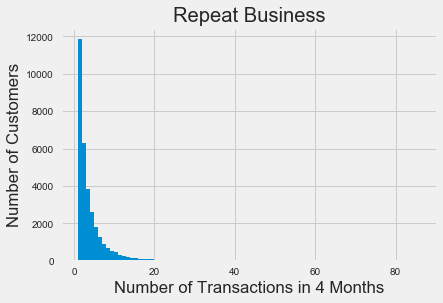

In [32]:
rpt_business.hist(bins=rpt_business.max())
plt.xlabel('Number of Transactions in 4 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')

#### Question 9

A customer that is on the left side of the distribution shops only sporadically at Ta Feng, and a customer on the right side of the distribution shops at Ta Feng very frequently. The distribution is skewed right with nearly all the customers shopping fewer than 20 times in the four month period.  Let's zoom in on the x-axis to better view the shape of the distribution of the bulk of the customers. To do this, remake the above plot as above, but set the limits of the x-axis to 0 and 20 to zoom in on the range where we find most of the customers.


(0, 30)

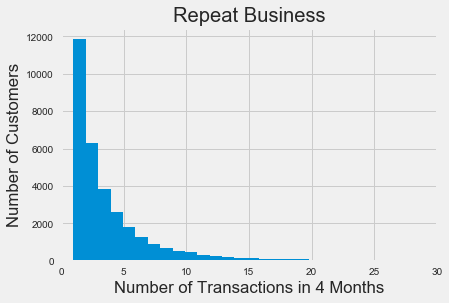

In [33]:
rpt_business.hist(bins=rpt_business.max())
plt.xlabel('Number of Transactions in 4 Months')
plt.ylabel('Number of Customers')
plt.title('Repeat Business')
plt.xlim(0, 30)

In [34]:
...

Ellipsis

#### Question 10
We have successfully filled the plotting region with our histogram, and we can more easily see how rapidly the number of shopping trips trails off.  We wonder just how much of our data is concentrated on the left side.  Use the `quantile` method to calculate the deciles (i.e., the 0th, 10th, 20th, ..., 90th, and 100th percentiles) of `rpt_business`.

In [35]:
rpt_deciles = rpt_business.quantile(np.arange(0, 1.1, 0.1))
rpt_deciles

0.0     1.0
0.1     1.0
0.2     1.0
0.3     1.0
0.4     2.0
0.5     2.0
0.6     3.0
0.7     4.0
0.8     5.0
0.9     8.0
1.0    86.0
Name: transaction_time, dtype: float64

#### Question 11

The percentiles tell us that 90% of customers shopped at Ta Feng 8 times or fewer in the four months spanning our data set and more than half went only 1 or 2 times! Perhaps we can bring in the large values and stretch the small values with a log transform.  Remake the histogram as before, except this time, rescale the x-axis with a log transformation. Hint: To make the tick marks appear, you may want to look into pyplot's `tick_params`.

In [36]:
np.sqrt(10)

3.1622776601683795

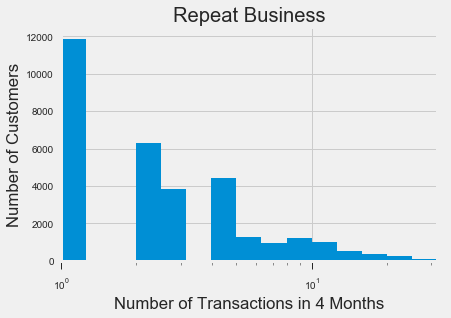

In [37]:
rpt_business.hist(bins=np.logspace(0, 4, 41))
plt.xlabel('Number of Transactions in 4 Months')
plt.ylabel('Number of Customers')
plt.xscale('log')
plt.title('Repeat Business')
plt.xlim(0, 3.16e1)
plt.tick_params(axis='x', which='minor', length=4, top=False)
plt.tick_params(axis='x', length=8, top=False)

In this case, the log transformation does not help symmetrize the distribution. Since the vast bulk of the data take on only 8 distinct values with over half the data being either a 1 or a 2, the log transformation has little impact.

# Taking the data to another level

Next, we investigate the shopping trips in greater detail.  For example, we might be interested in the total number of items purchased, the total amount spent, and the number of unique products purchased on the trip.  Since our data are at the level of items purchased, we need to aggregate our data to the shopping cart. Fortunately we have tools to do this; that is, we will change the granularity. For each shopping cart, we find:  

* `num_items` - the total number of items purchased
* `total` - the total value of the cart
* `num_unique` - the number of unique products purchased

#### Question 12

Create a data frame called `carts` that contains the variables above, as well as `customer_id` and `transaction_time`.  Make sure you use the names specified.

In [38]:
dft = taFengFull.groupby(['customer_id', 'transaction_time'])
carts = pd.DataFrame()
carts['num_items'] = dft['amount'].sum()
carts['num_unique'] = dft['amount'].count()
carts['total'] = dft['sales_price'].sum()
carts

num_items  num_unique  total
customer_id transaction_time                                 
1069        2000-11-13 00:00:00          2           2    187
            2001-01-21 00:00:00          3           3    971
            2001-02-03 00:00:00          9           5    496
            2001-02-10 00:00:00          2           1    290
1113        2000-11-12 00:00:00          5           2    420
            2000-11-26 00:00:00          3           3    558
            2000-11-27 00:00:00          6           6    624
            2001-01-06 00:00:00          9           7    628
1250        2001-02-04 00:00:00          5           4    734
            2001-02-10 00:00:00         13          10    849
1359        2000-12-04 00:00:00          4           3    364
1823        2000-11-02 00:00:00         16           9   1256
            2000-11-06 00:00:00          6           2    918
            2001-01-24 00:00:00          3           3    433
2189        2000-12-02 00:00:00         89          41   9078
            2001-01-03 00:00:00         52          21   4978
3667        2000-12-08 00:00:00          8           3    979
            2000-12-26 00:00:00          4           2   8960
            2001-02-01 00:00:00         11           6   1241
            2001-02-08 00:00:00          3           2    329
4282        2000-12-15 00:00:00          2           2    171
            2001-01-13 00:00:00          7           7    796
4381        2000-11-18 00:00:00         13          11    701
4947        2000-12-03 00:00:00         24          21   1875
            2000-12-10 00:00:00         16          15   1488
4961        2001-02-05 00:00:00          8           6    553
4978        2001-01-03 00:00:00         12          11   1251
            2001-01-22 00:00:00         13          12   1194
5241        2000-12-16 00:00:00          6           6    325
            2001-01-07 00:00:00         19          10    931
...                                    ...         ...    ...
2179568     2001-02-28 00:00:00          5           5    406
2179605     2001-02-28 00:00:00         70          52   6001
2179643     2001-02-28 00:00:00         28           7    887
20002000    2000-11-08 00:00:00          3           3     48
            2000-11-11 00:00:00          2           1     30
            2000-11-12 00:00:00          2           1    400
            2000-11-20 00:00:00          1           1    270
            2000-11-25 00:00:00        123         100  10305
            2000-11-26 00:00:00        111          77   9919
            2000-11-27 00:00:00          4           4    153
            2000-11-28 00:00:00          9           9    776
            2000-11-29 00:00:00          4           1    236
            2000-12-02 00:00:00          3           3    250
            2000-12-03 00:00:00         99          64   9213
            2000-12-04 00:00:00         20          17    965
            2000-12-05 00:00:00         40          31   2970
            2000-12-06 00:00:00          3           3    340
            2000-12-07 00:00:00         13           8    439
            2000-12-08 00:00:00         10           9    689
            2000-12-10 00:00:00         10           9    807
            2000-12-11 00:00:00         23          16   2110
            2000-12-12 00:00:00         25          14    694
            2000-12-13 00:00:00          1           1    100
            2000-12-14 00:00:00         19          14    827
            2000-12-15 00:00:00         17          15   2232
            2000-12-16 00:00:00         28          23   2404
            2000-12-17 00:00:00         16           9    760
            2000-12-18 00:00:00         27           9    911
            2001-01-20 00:00:00          9           8   1075
            2001-02-05 00:00:00          6           2     72

[119578 rows x 3 columns]

#### Question 13
Let's take a look at the relationship between the number of items in a cart and the cart total.  Intuitively the two should be positively correlated, but why assume when we can verify?  Make a scatter plot that will help us inspect the relationship between these two variables. 

![](quantity_vs_value_raw.png)

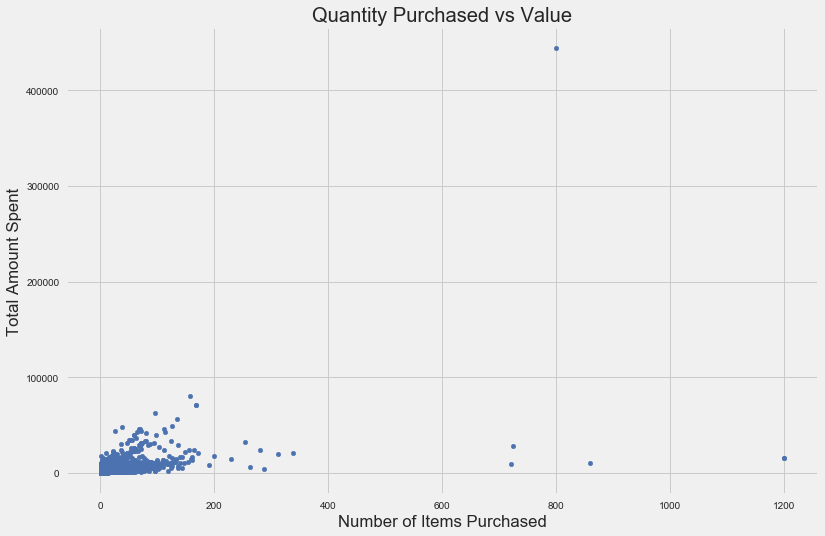

In [39]:
carts.plot(kind='scatter', x='num_items', y='total', figsize=(12,8), title="Quantity Purchased vs Value")
plt.xlabel('Number of Items Purchased')
plt.ylabel('Total Amount Spent')

#### Question 14

We might expect from the distribution of the number of trips that there would be a few very large values for the number of items and the total amount spent.  Indeed, a handful of observations make it difficult to see the shape of the bulk of the data.  As before take a log transformation of these two variables. Make another scatter plot, but this time, log-transform both the x and y axes.

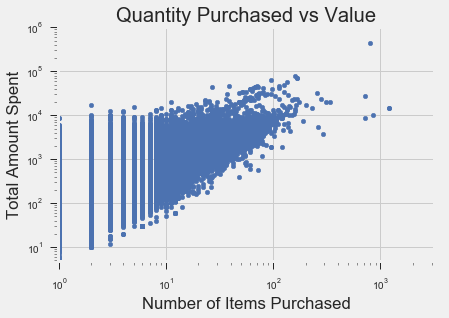

In [40]:
carts.plot(kind='scatter', x='num_items', y='total', title="Quantity Purchased vs Value", loglog=True)
plt.xlabel("Number of Items Purchased")
plt.ylabel('Total Amount Spent')
plt.xlim(0, 3.16e3)
plt.ylim(0, 1e6)
plt.tick_params(axis='x', which='minor', length=4, top=False)
plt.tick_params(axis='x', length=8, top=False)
plt.tick_params(axis='y', which='minor', length=4, right=False)
plt.tick_params(axis='y', length=8, right=False)

#### Question 15

Notice the vertical bands in the scatter plot. These are from the discreteness of the number of items purchased.  We are better able to see these bands with the log transformed data.

While there seems to be a positive correlation in the point cloud, the over plotting makes be deceiving us. We will make a few changes to the scatter plot to attempt to address the problem. First, we adjust the opacity of the plotting symbols by changing alpha values for the scatter plot portion of the plot. We also shrink the size of the plotting symbol to reduce the amount of over plotting.  Additionally, we add a line-of-best-fit through the data. Hint: Use seaborn's `lmplot` to simultaneously plot the points and the line-of-best-fit.


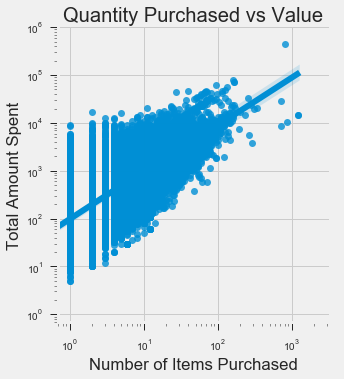

In [41]:
sns.lmplot('num_items', 'total', data=carts)
plt.title('Quantity Purchased vs Value')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Total Amount Spent')
plt.xscale('log')
plt.yscale('log')
plt.xlim(7e-1, 3.16e3)
plt.ylim(7e-1, 1e6)
plt.tick_params(axis='x', which='minor', length=4, top=False)
plt.tick_params(axis='x', length=8, top=False)
plt.tick_params(axis='y', which='minor', length=4, right=False)
plt.tick_params(axis='y', length=8, right=False)

From this scatter plot, we can make several observations about the relationship between the number of items purchased and the total amount spent. It appears that there is a linear association between the amount spent and number of items purchased on a log-log scale.  (A log-log scale implies that, say, a 10% increase in the number of items purchased is associated with b*10% increase in the amount spent, on average).  We also note that the spread in amount spent varies with the number of items spent; in particular, the spread is greater for smaller shopping baskets.  This might be due to shopping trips where one expensive item is purchased. 

# Time

In this question, we will investigate temporal trends in shopping behavior.  We begin with the technical details of date-time data.

#### Run this cell: Parsing Time
Currently, your computer understands the transaction times as strings.  The code below typecasts the transaction time column to the `datetime64`.

In [42]:
time_format = "%Y-%m-%d %H:%M:%S"
taFengFull['transaction_time'] = pd.to_datetime(taFengFull['transaction_time'], 
                                                format = time_format)

#### Question 16
Now that we have the time data in a usable format, we can start looking into customer trends over time.  Make a line plot of the number of unique customers per day against day.  Note that we have once again changed the granularity at which we are examining our data.

![](unique_per_day.png)

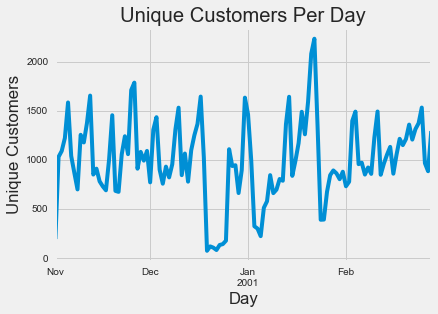

In [43]:
taFengFull.groupby('transaction_time')['customer_id'].nunique().plot(title="Unique Customers Per Day")
plt.xlabel('Day')
plt.ylabel('Unique Customers')

#### Question 17

The data seems to exhibit some patterns.  It would seem plausible that people are more likely to shop on certain days of the week.  Make a box-and-whiskers plot that summarizes customer counts by day of the week.  Hint: For our solution, we created a new column called `day_of_week` that contains the name of, well, the day of the week.

![](number_by_dow.png)

In [44]:
taFengFull['dow'] = \
    taFengFull['transaction_time'].dt.weekday_name \
    .astype('category', categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [45]:
taFengFull['woy'] = taFengFull['transaction_time'].dt.week

In [46]:
dfc = taFengFull[['woy', 'dow', 'customer_id', 'transaction_time']] \
    .drop_duplicates() \
    .groupby(['dow', 'woy']) \
    .size() \
    .reset_index(name='count')


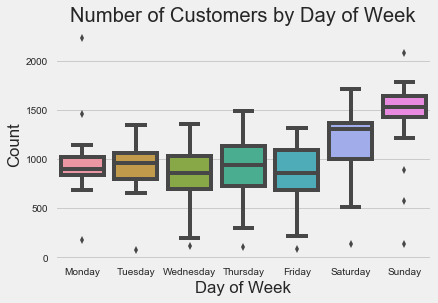

In [47]:
sns.boxplot('dow', 'count', data=dfc)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Customers by Day of Week')

The boxplots confirm that typical Sundays have many more (~500) customers shopping in comparison to the week days.  Also, many customers visit Ta Feng on Saturday.

#### Question 18
There seems to be three distinct times that the number of customers drops below "normal" counts.  Could these days be holidays?  Name three holidays that would most influence shopping behavior in this time period.  Hint: To answer this question, you will have to understand the temporal and geographical context of the data.

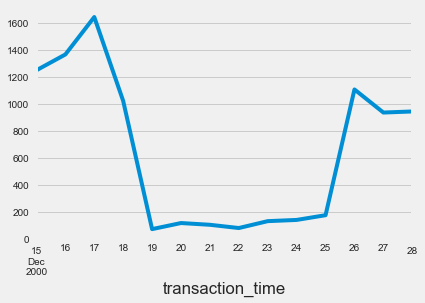

In [48]:
taFengFull.groupby('transaction_time')['customer_id'].nunique().loc["2000-12-15":"2000-12-28"].plot()

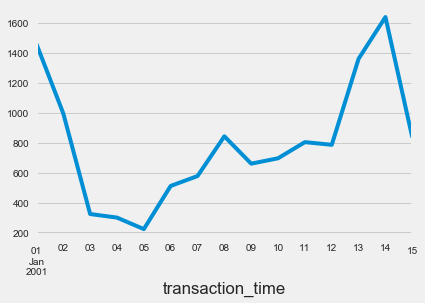

In [49]:
taFengFull.groupby('transaction_time')['customer_id'].nunique().loc["2001-01-01":"2001-01-15"].plot()

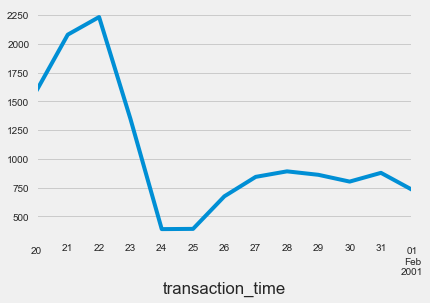

In [50]:
taFengFull.groupby('transaction_time')['customer_id'].nunique().loc["2001-01-20":"2001-02-01"].plot()

Christmas, New Year and Spring Festival

#### Question 19

Reproduce the line graph from above, but this time, add reference lines so that you can easily pick out which days are holidays.

![](number_by_holiday.png)

It seems like holidays are indeed a plausible explanation for the lows and highs we see on our plot!  It looks like Ta Feng has a week of really slow business right before Christmas and after both New Year celebrations.  The most pronounced peak comes right before the celebration of the Lunar New Year.

# Self-Directed EDA
The last two questions are intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices

#### Question 20

Make a visualization of and interpret the distribution of one of the following quantitities:

* Age distribution of the shoppers
* Distribution of the number of trips each customer makes

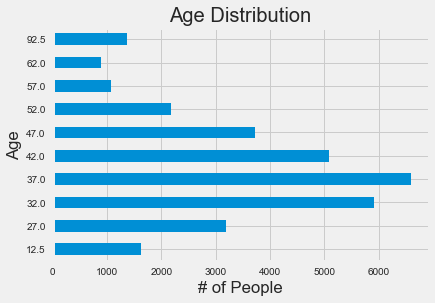

In [60]:
dfage = taFengFull.groupby("age_center")["customer_id"].nunique()
dfage.plot.barh(title="Age Distribution")
plt.xlabel("# of People")
plt.ylabel("Age")

### Your Observations

#### Question 21

Make a visualization of and interpret the relationship between one of the following pairs:

* Amount spent on a shopping trip and the number of trips
* Amount spent on a shopping trip and the customer's age. 
* Frequency of shopping and the customer's age 

In [82]:
dfsum = pd.DataFrame() 
dfsum["sales_price"] = taFengFull.groupby("age_center")["sales_price"].sum()

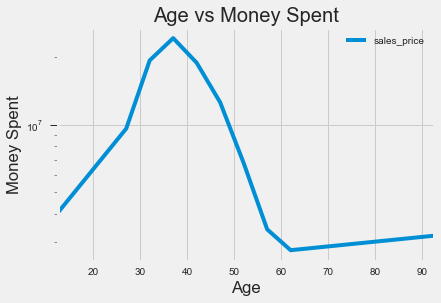

In [87]:
dfsum.plot(title="Age vs Money Spent", logy=True)
plt.ylabel('Money Spent')
plt.xlabel('Age')
plt.tick_params(axis='y', which='minor', length=4, right=False)
plt.tick_params(axis='y', length=8, right=False)

### Your Observations
People in middle age are more willing to spend much money on shopping, while elder and youth spend less on shopping.

# Submitting your assignment
First, run the next cell to run all the tests at once.

In [88]:
_ = ok.grade_all()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

Then, we'll submit the assignment to OkPy so that the staff will know to grade it. You can submit as many times as you want, and you can choose which submission you want us to grade by going to https://okpy.org/cal/data100/sp17/.  After you've done that, make sure you've pushed your changes to Github as well!

In [89]:
# Now, we'll submit to okpy
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Backup... 100% complete
Backup successful for user: doomsplayer@gmail.com

